In [27]:
import pandas as pd
import numpy as np
import glob
import os

pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = r'tahillar'                    
all_files = glob.glob(os.path.join(path, '*.csv'))    
dfList = [pd.read_csv(f,  sep="|", encoding='utf-8', header=3)
          .rename(columns={"Unnamed: 1" : "İl", "Unnamed: 2" : "Tarih"}) for f in all_files]

In [3]:
for df in dfList:
    df.drop(df.columns[df.columns.str.contains('unnamed',case = False)], axis=1, inplace=True)
    df.dropna(axis=0, how='all', inplace=True)
    df['İl'].ffill(inplace=True)

In [4]:
data = pd.merge(dfList[0], dfList[1], how='outer', on=["İl", "Tarih"])
del dfList[0]
del dfList[1]

In [5]:
for df in dfList:
     data = data.merge(df, how='outer', on=["İl", "Tarih"])

In [6]:
data.fillna(round(data.mean()), inplace = True)
data.fillna(0, inplace = True)

In [7]:
tahillar = [col for col in data.columns if 'Üretim Miktarı ve 01.11.' in col]

In [8]:
listUrun = []
for col in tahillar:
    listUrun.append(pd.melt(data, id_vars=['İl', 'Tarih'], value_vars=col).merge(data.drop(tahillar, axis=1)))

In [9]:
listUrun[0]

,İl,Tarih,variable,value,"Meyveler, İçecek Ve Baharat Bitkileri Alanı - Dekar",Nadas Alanı - Dekar,Sebze Alanı - Dekar,Süs Bitkileri Alanı - Dekar,Tahıllar Ve Diğer Bitkisel Ürünlerin Alanı - Dekar,Hasat Edilen Alan ve 01.11.11.00.00. (Durum Buğdayı) - Dekar_x,...,Ekilen Alan ve 01.19.31.06.02. (Fiğ (Macar) Tohumu) - Dekar,Ekilen Alan ve 01.19.31.06.03. (Fiğ (Diğer) Tohumu) - Dekar,Ekilen Alan ve 01.19.31.08.00. (Çim Tohumu) - Dekar,Ekilen Alan ve 01.19.31.09.00. (Yonca Tohumu) - Dekar,Ekilen Alan ve 01.28.30.00.08. (Haşhaş Kapsülü (Haşhaş Kellesi)) - Dekar,Ekilen Alan ve 01.28.30.00.11. (Adaçayı) - Dekar,Ekilen Alan ve 01.28.30.00.17. (Isırgan Otu) - Dekar,Ekilen Alan ve 01.28.30.00.19. (Lavanta) - Dekar,Ekilen Alan ve 01.28.30.00.23. (Oğul Otu (Melisa)) - Dekar,"Ekilen Alan ve 01.28.30.00.36. (Gül, Yağlık) - Dekar"
0,Adana-1,2004.0,Üretim Miktarı ve 01.11.11.00.00. (Durum Buğda...,94170.0,443400.0,102500.0,287740.0,0.0,5126320.0,344118.0,...,9925.0,3046.0,3000.0,1421.0,28078.0,312.0,3.0,261.0,19.0,15.0
1,Adana-1,2005.0,Üretim Miktarı ve 01.11.11.00.00. (Durum Buğda...,94170.0,452390.0,63220.0,271890.0,0.0,5156130.0,344118.0,...,9925.0,3046.0,3000.0,1421.0,28078.0,312.0,3.0,261.0,19.0,15.0
2,Adana-1,2006.0,Üretim Miktarı ve 01.11.11.00.00. (Durum Buğda...,94170.0,482610.0,36260.0,299613.0,0.0,4803462.0,344118.0,...,9925.0,3046.0,3000.0,1421.0,28078.0,312.0,3.0,261.0,19.0,15.0
3,Adana-1,2007.0,Üretim Miktarı ve 01.11.11.00.00. (Durum Buğda...,94170.0,508607.0,51350.0,284929.0,0.0,4697768.0,344118.0,...,9925.0,3046.0,3000.0,1421.0,28078.0,312.0,3.0,261.0,19.0,15.0
4,Adana-1,2008.0,Üretim Miktarı ve 01.11.11.00.00. (Durum Buğda...,94170.0,535425.0,78383.0,320589.0,0.0,4619870.0,344118.0,...,9925.0,3046.0,3000.0,1421.0,28078.0,312.0,3.0,261.0,19.0,15.0
5,Adana-1,2009.0,Üretim Miktarı ve 01.11.11.00.00. (Durum Buğda...,94170.0,541264.0,76159.0,328378.0,0.0,4663473.0,344118.0,...,9925.0,3046.0,3000.0,1421.0,28078.0,312.0,3.0,261.0,19.0,15.0
6,Adana-1,2010.0,Üretim Miktarı ve 01.11.11.00.00. (Durum Buğda...,94170.0,582614.0,75954.0,319428.0,0.0,4528357.0,344118.0,...,9925.0,3046.0,3000.0,1421.0,28078.0,312.0,3.0,261.0,19.0,15.0
7,Adana-1,2011.0,Üretim Miktarı ve 01.11.11.00.00. (Durum Buğda...,94170.0,605037.0,78241.0,311605.0,435.1,3967661.0,344118.0,...,9925.0,3046.0,3000.0,1421.0,28078.0,312.0,3.0,261.0,19.0,15.0
8,Adana-1,2012.0,Üretim Miktarı ve 01.11.11.00.00. (Durum Buğda...,94170.0,623479.0,88319.0,311510.0,321.0,3784339.0,344118.0,...,9925.0,3046.0,3000.0,1421.0,28078.0,312.0,3.0,261.0,19.0,15.0
9,Adana-1,2013.0,Üretim Miktarı ve 01.11.11.00.00. (Durum Buğda...,94170.0,661085.0,82545.0,300491.0,143.6,3707347.0,344118.0,...,9925.0,3046.0,3000.0,1421.0,28078.0,312.0,3.0,261.0,19.0,15.0


In [10]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

new_data = listUrun[0]
transformed = pd.DataFrame(enc.fit_transform(new_data.loc[:, "İl" : "variable"]).toarray())

new_data = new_data.join(transformed)

In [11]:
new_data.head()

,İl,Tarih,variable,value,"Meyveler, İçecek Ve Baharat Bitkileri Alanı - Dekar",Nadas Alanı - Dekar,Sebze Alanı - Dekar,Süs Bitkileri Alanı - Dekar,Tahıllar Ve Diğer Bitkisel Ürünlerin Alanı - Dekar,Hasat Edilen Alan ve 01.11.11.00.00. (Durum Buğdayı) - Dekar_x,...,90,91,92,93,94,95,96,97,98,99
0,Adana-1,2004.0,Üretim Miktarı ve 01.11.11.00.00. (Durum Buğda...,94170.0,443400.0,102500.0,287740.0,0.0,5126320.0,344118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Adana-1,2005.0,Üretim Miktarı ve 01.11.11.00.00. (Durum Buğda...,94170.0,452390.0,63220.0,271890.0,0.0,5156130.0,344118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Adana-1,2006.0,Üretim Miktarı ve 01.11.11.00.00. (Durum Buğda...,94170.0,482610.0,36260.0,299613.0,0.0,4803462.0,344118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Adana-1,2007.0,Üretim Miktarı ve 01.11.11.00.00. (Durum Buğda...,94170.0,508607.0,51350.0,284929.0,0.0,4697768.0,344118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Adana-1,2008.0,Üretim Miktarı ve 01.11.11.00.00. (Durum Buğda...,94170.0,535425.0,78383.0,320589.0,0.0,4619870.0,344118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
X_train = new_data[new_data['Tarih'] < 2017.0]
y_train = X_train['value']
X_train = X_train.loc[:, 'Meyveler, İçecek Ve Baharat Bitkileri Alanı - Dekar':]

from sklearn.preprocessing import MinMaxScaler

train_scaler = MinMaxScaler()
X_train = train_scaler.fit_transform(X_train)

In [13]:
X_val = new_data[new_data['Tarih'] >= 2017.0]
y_val = X_val['value']
X_val = X_val.loc[:, 'Meyveler, İçecek Ve Baharat Bitkileri Alanı - Dekar':]

val_scaler = MinMaxScaler()
X_val = val_scaler.fit_transform(X_val)

In [14]:
from lazypredict.Supervised import LazyRegressor


reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_val, y_train, y_val)

print(models)

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).
                                                              Adjusted R-Squared  \
Model                                                                              
Lars                          17475538257908603721562150011724412834645069004...   
TransformedTargetRegressor                           210255930504698402963456.00   
LinearRegression                                     210255930504698402963456.00   
SGDRegressor                                                60769452725925792.00   
LassoLars                                                                 344.60   
GaussianProcessRegressor                          

100%|██████████| 42/42 [00:32<00:00,  1.31it/s]


In [15]:
from sklearn.svm import LinearSVR

lsvr = LinearSVR(random_state=0, tol=1e-5)

lsvr.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(lsvr.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(lsvr.score(X_val, y_val)))

Accuracy on the training subset: -0.591
Accuracy on the test subset: -0.890


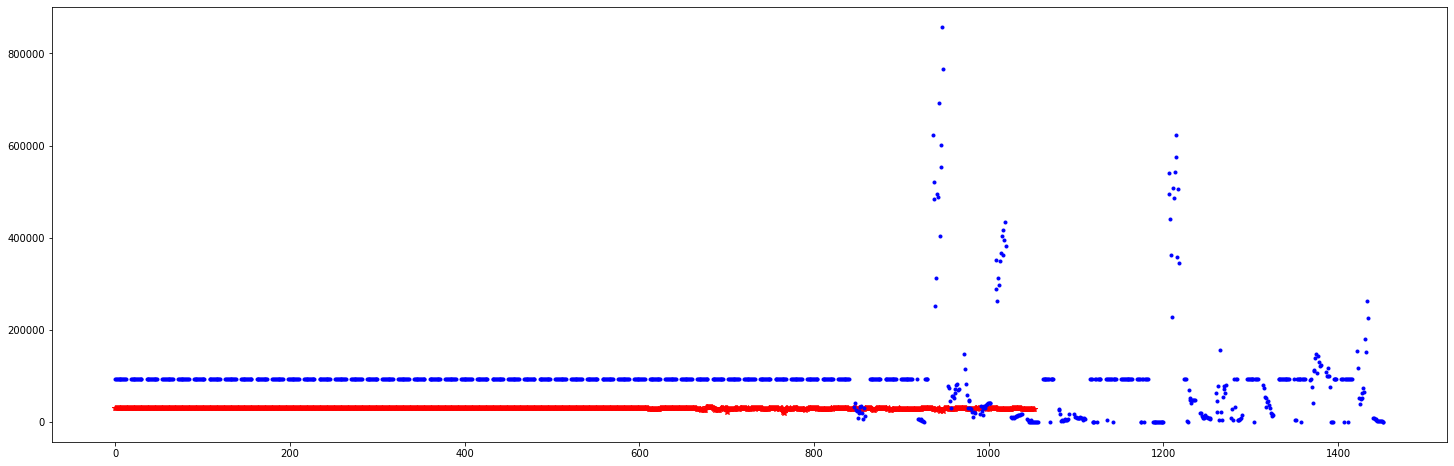

In [16]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (25,8)
plt.plot(lsvr.predict(X_train), "r*")
plt.plot(y_train, "b.")

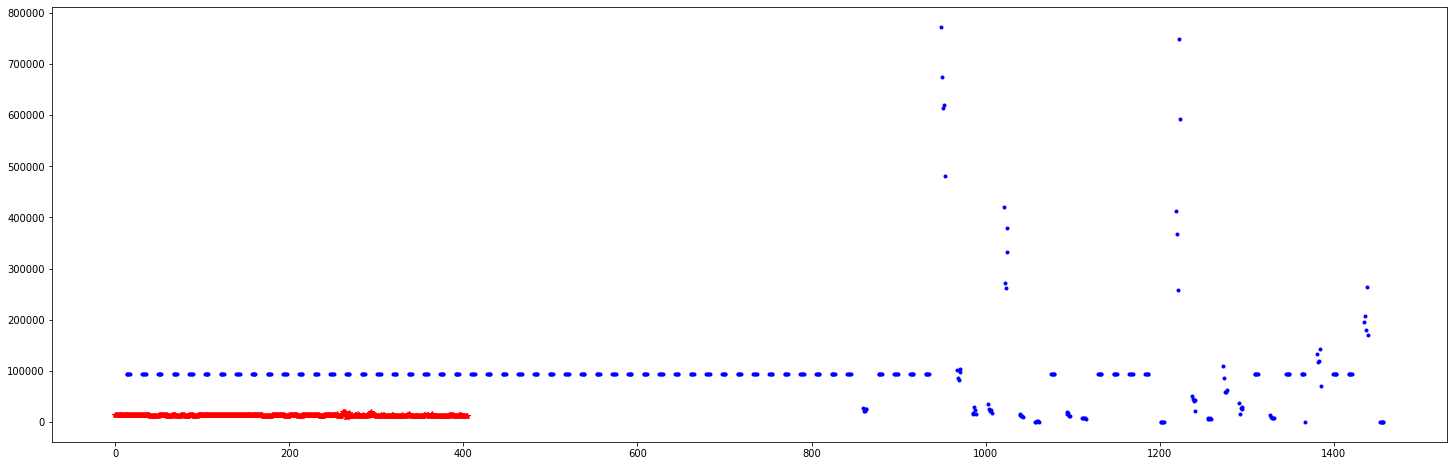

In [17]:
plt.plot(lsvr.predict(X_val), "r*")
plt.plot(y_val, "b.")

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(lr.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(lr.score(X_val, y_val)))

Accuracy on the training subset: 0.994
Accuracy on the test subset: -74313906832785249665024.000


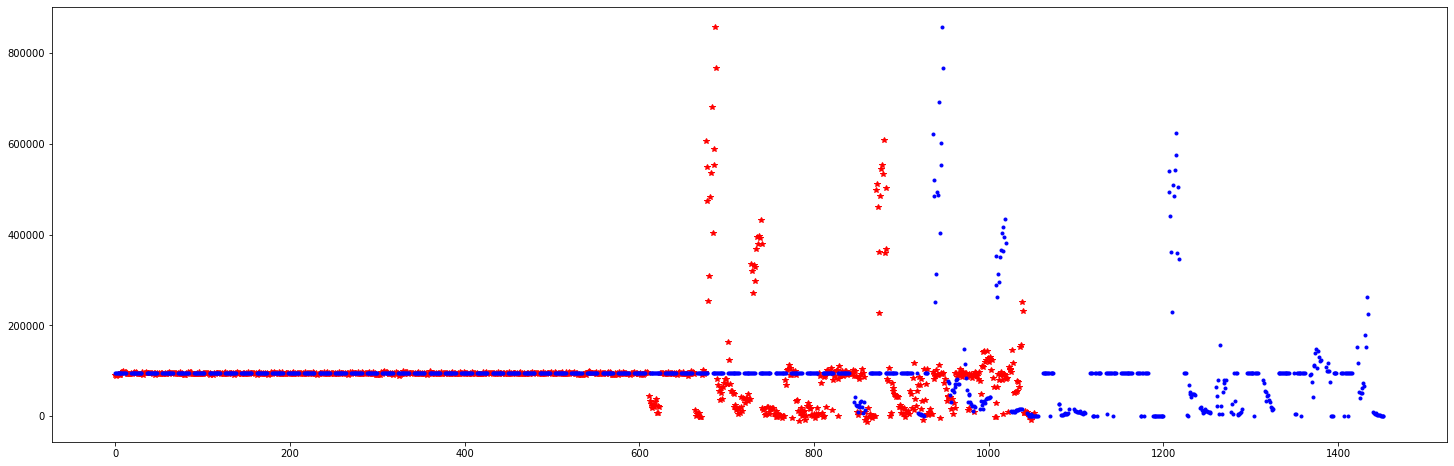

In [19]:

plt.plot(lr.predict(X_train), "r*")
plt.plot(y_train, "b.")

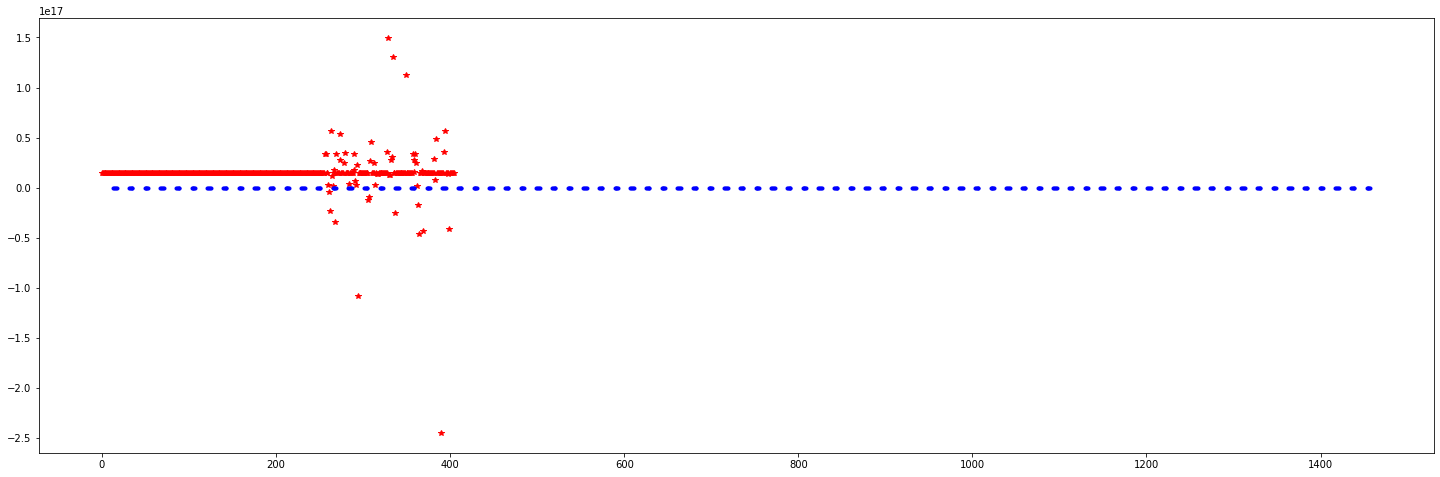

In [20]:
plt.plot(lr.predict(X_val), "r*")
plt.plot(y_val, "b.")

In [21]:
from sklearn.linear_model import OrthogonalMatchingPursuit
reg = OrthogonalMatchingPursuit(normalize=False)

reg.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(reg.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(reg.score(X_val, y_val)))

Accuracy on the training subset: 0.978
Accuracy on the test subset: 0.612


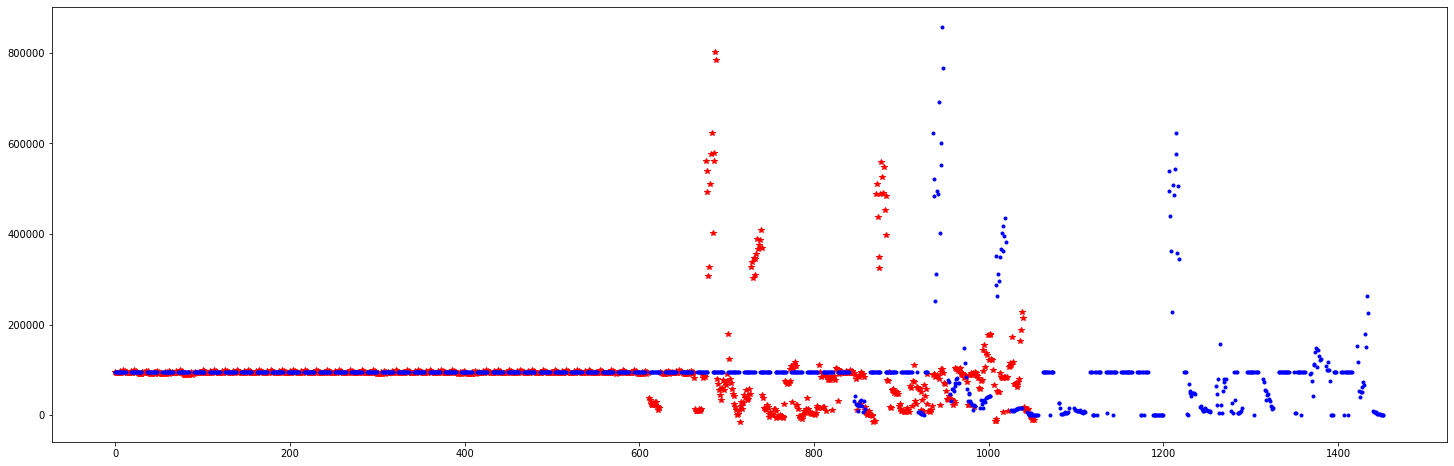

In [22]:
plt.plot(reg.predict(X_train), "r*")
plt.plot(y_train, "b.")

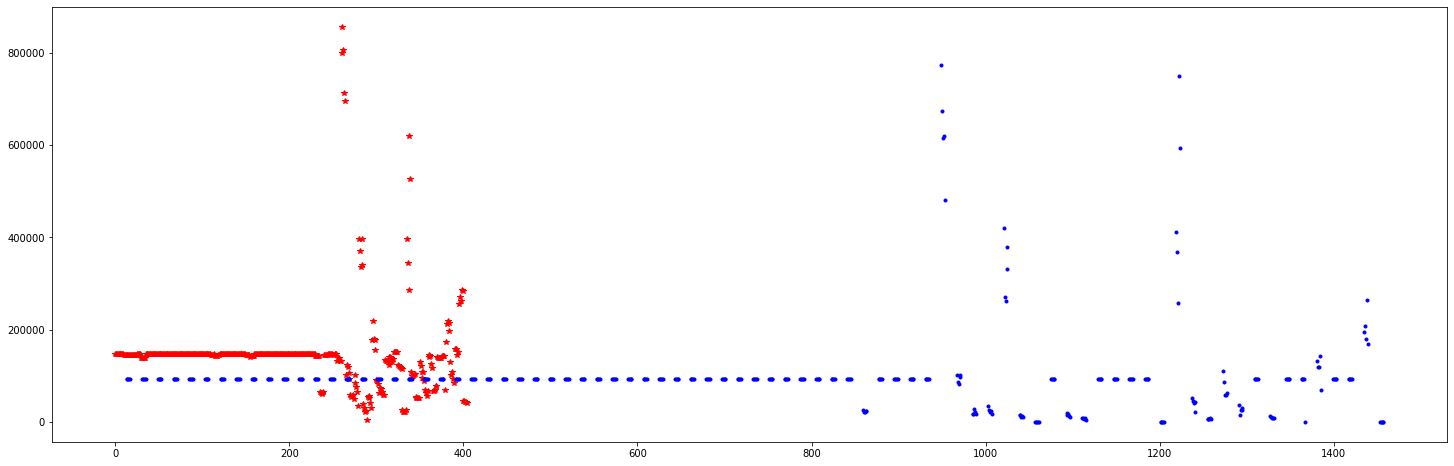

In [23]:
plt.plot(reg.predict(X_val), "r*")
plt.plot(y_val, "b.")

In [24]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(reg.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(reg.score(X_val, y_val)))

[13:51:27] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:51:29] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy on the training subset: 0.978
Accuracy on the test subset: 0.612


In [28]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

y_pred = xgb_model.predict(X_train)

mse=mean_squared_error(y_train, y_pred)
print(np.sqrt(mse))

55.72108475944056
